In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 1. Phoneme Dataset
Load the phoneme dataset using Pandas

In [2]:
data = pd.read_csv('data/phoneme.csv')
print(data)

# TODO 
# Split the dataset into a train and test dataset according to column "speaker".
# Be sure to exclude row number, "speaker" and response columns from your features.

      row.names       x.1       x.2       x.3       x.4       x.5       x.6  \
0             1   9.85770   9.20711   9.81689   9.01692   9.05675   8.92518   
1             2  13.23079  14.19189  15.34428  18.11737  19.53875  18.32726   
2             3  10.81889   9.07615   9.77940  12.20135  12.59005  10.53364   
3             4  10.53679   9.12147  10.84621  13.92331  13.52476  10.27831   
4             5  12.96705  13.69454  14.91182  18.22292  18.45390  17.25760   
...         ...       ...       ...       ...       ...       ...       ...   
4504       4505  11.38394  10.21040  16.32658  18.30125  16.91804  10.90029   
4505       4506  12.01774  11.86761  16.34707  18.05214  15.97599  12.86022   
4506       4507  12.30174  12.40383   9.06497  12.43750  13.48388  13.52034   
4507       4508   8.39388   9.84770  16.24534  17.35311  14.80537  12.72429   
4508       4509   8.14032   9.93753  16.30187  17.31425  14.40116  13.52353   

           x.7       x.8       x.9  ...     x.249  

In [3]:
X = data.drop(columns=["row.names", "speaker", "g"])
y, levels = pd.factorize(data.g)
levels

Index(['sh', 'iy', 'dcl', 'aa', 'ao'], dtype='object')

In [4]:
is_train = data['speaker'].str.startswith("train.")
X_train = X[is_train]
y_train = y[is_train]
X_test = X[np.logical_not(is_train)]
y_test = y[np.logical_not(is_train)]

### 2. LDA modelling
Fit an LDA model. Compute and report the train and test error.

In [5]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
train_err = 1 - model.score(X_train, y_train)
test_err = 1 - model.score(X_test, y_test)
print(f"Training error = {train_err*100:.2f}%, test error = {test_err*100:.2f}%")

Training error = 5.60%, test error = 8.04%


### 3. LDA canonical coordinates
 Plot the projection of the training data onto the first two canonical coordinates of the LDA and report your findings. Investigate the data projected on further dimensions using the \texttt{dimen} parameter.

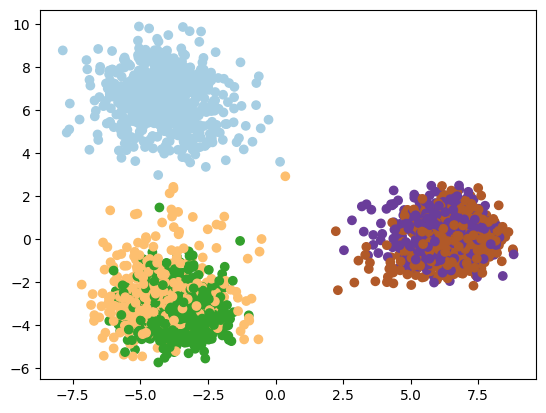

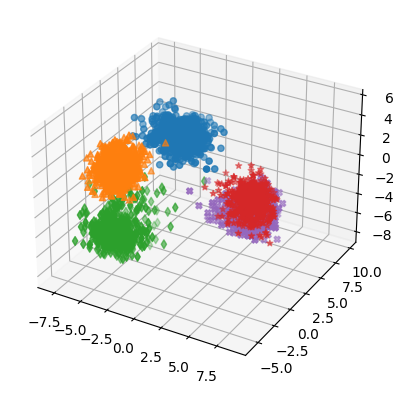

In [6]:
X_canon = model.transform(X_train)
plt.scatter(X_canon[:,0], X_canon[:,1], c=y_train, cmap="Paired")

# fig = plt.figure()
# ax = fig.add_subplot(projection='3d')
# ax.scatter(X_canon[:,0], X_canon[:,1], X_canon[:,2], c=y_train, cmap="Paired")

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
markers = ["o","^","d","*","X"]
for i,marker in enumerate(markers):
    X_i = X_canon[y_train == i, :]
    y_i = y_train[y_train == i]
    ax.scatter(X_i[:,0], X_i[:,1], X_i[:,2], marker=marker)
    

The canonical coordinates are the directions of maximal variance in the predictors between the different classes, using .transform method projects the 256 predictors into 4 with the maximum variance so
we are able to capture most of the information with less computation resource compared to using the entire 256 predictors. And as can be seen from the above 2D and 3D scatters plotts the data is 
to some extent linearly seperable using only the canonical coordinates

### 4. LDA on "aa", "ao"
Select the two phonemes "aa" and "ao". Fit an LDA model on this data set and repeat the steps
    done in (2).

In [7]:
aa_ao_filter = np.logical_or(y_train==3 ,  y_train==4)
y_aa_ao = y_train[aa_ao_filter]
X_aa_ao = X_train[aa_ao_filter]

aa_ao_test = np.logical_or(y_test == 3 , y_test == 4)
y_aa_ao_test = y_test[aa_ao_test]
X_aa_ao_test = X_test[aa_ao_test]

lda = LinearDiscriminantAnalysis()

lda.fit(X_aa_ao, y_aa_ao)
train_err = 1 - lda.score(X_aa_ao, y_aa_ao)
test_err = 1 - lda.score(X_aa_ao_test, y_aa_ao_test)
print(f"Training error = {train_err*100:.2f}%, test error = {test_err*100:.2f}%")

Training error = 10.64%, test error = 21.41%


## 5. QDA
Repeat steps (b) and (d) using QDA and report your findings. Would you prefer LDA or QDA in this example? Why?

In [8]:
# TODO
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
model = QuadraticDiscriminantAnalysis()
model.fit(X_train, y_train)
train_err = 1 - model.score(X_train, y_train)
test_err = 1 - model.score(X_test, y_test)
print(f"Training error = {train_err*100:.2f}%, test error = {test_err*100:.2f}%")
# post_log = model.predict_log_proba(X_train)
# print(f"the log probablity of the prostatrior {post_log}")

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_aa_ao, y_aa_ao)
train_err = 1 - qda.score(X_aa_ao, y_aa_ao)
test_err = 1 - qda.score(X_aa_ao_test, y_aa_ao_test)
print(f"Training error = {train_err*100:.2f}%, test error = {test_err*100:.2f}%")


Training error = 0.00%, test error = 15.83%
Training error = 0.00%, test error = 33.94%


From the Training and testing error we can see that QDA tends to overfit the data. With this in mind, we prefer using LDA.
The QDA is able to captures high variance in the population under the train and test, that is why it has tendenacy to overfit when the data is linear seperable and the number of samples is small.
The QDA also performs bad when the data has outliers
The Data is un-balanced we have 167 AA examples compared to the 263 AO example so QDA tends to classify most of the points as AO

## 6. Confusion Matrices
Generate confusion matrices for the LDA and QDA model for "aa" and "ao". Which differences can you observe between the models?

In [9]:
# TODO 
from sklearn.metrics import confusion_matrix

lda_pred = lda.predict(X_aa_ao_test)
lda_cm = confusion_matrix(y_aa_ao_test, lda_pred)
print(lda_cm)
qda_pred = qda.predict(X_aa_ao_test)
qda_cm = confusion_matrix(y_aa_ao_test, qda_pred)
print(qda_cm)

[[121  55]
 [ 39 224]]
[[ 29 147]
 [  2 261]]


We refer to class "aa" as TRUE and class "ao" as FALSE
from the confusion matrices we find that QDA tends to classify more data as "AO" hence the QDA has more False positive compared to the LDA, this is due to the fact that the data is unbalanced
as we have 167 AA examples while having 263 AO examples